### Benchmarking based on PXD005486

#### The data contains 12 human proteins and a bovin protein spiked into an E Coli background using various known concentrations, it employed multiplexed labeling using tandem mass tags (TMT), where multiple samples are quantitated simultaneously using isobaric tags. Proteins were spiked twice using the same concentration indifferent channels and only once for the two highest concentrations. Therefore, only a single, or two replicate measurements at maximum are available when comparing two concentrations.  A total of 12 peptide fractions were prepared.

In [1]:
%load_ext rpy2.ipython

C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
%%R
data_folder = '../datasets/PXD005486'
setwd(data_folder)

In [5]:
# preprocess out_msstats.csv
import gzip

path = "out_msstats.csv.gz"
f_name = path.replace(".gz", "")
g_file = gzip.GzipFile(path)
with open(f_name, "wb+") as f:
    f.write(g_file.read())

In [4]:
quantms = pd.read_csv("./out_msstats.csv", sep=',', header=0)
quantms = quantms[-quantms['ProteinName'].str.contains("DECOY_")]
print(len(set(quantms['ProteinName'])))
quantms.head()

2391


,RetentionTime,ProteinName,PeptideSequence,Charge,Channel,Condition,BioReplicate,Run,Mixture,TechRepMixture,Fraction,Intensity,Reference
0,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,6,control|CT=protein;AC=ENO1;QY=1 pmol|CT=protei...,6,1_1_10,1,1_1,10,84206.68,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...
1,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,9,control|CT=protein;AC=ENO1;QY=1 pmol|CT=protei...,9,1_1_10,1,1_1,10,84253.47,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...
2,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,10,control|CT=protein;AC=ENO1;QY=4 pmol|CT=protei...,10,1_1_10,1,1_1,10,104447.00,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...
3,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,7,control|CT=protein;AC=ENO1;QY=4 pmol|CT=protei...,7,1_1_10,1,1_1,10,94212.23,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...
4,1576.384729,sp|P0A6P9|ENO_ECOLI,.(TMT6plex)AAAAAK(TMT6plex),2,8,control|CT=protein;AC=ENO1;QY=40 pmol|CT=prote...,8,1_1_10,1,1_1,10,102416.80,151107_Ecoli_12prot_spike_MS2_Fr10.mzML_contro...


From cffi callback <function _consolewrite_ex at 0x000001D3D33EA798>:
Traceback (most recent call last):
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\callbacks.py", line 132, in _consolewrite_ex
    s = conversion._cchar_to_str_with_maxlen(buf, n, _CCHAR_ENCODING)
  File "C:\Users\ChengXin\MyProgram\python\anaconda\pro\lib\site-packages\rpy2\rinterface_lib\conversion.py", line 133, in _cchar_to_str_with_maxlen
    s = ffi.string(c, maxlen).decode(encoding)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 1: invalid continuation byte
R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




INFO  [2021-12-16 14:22:31] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-16 14:22:34] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-16 14:22:34] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-16 14:22:34] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-16 14:22:35] ** Shared peptides are removed.
INFO  [2021-12-16 14:22:35] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-16 14:23:10] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-16 14:23:15] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-16 14:23:16] ** Fractions belongin

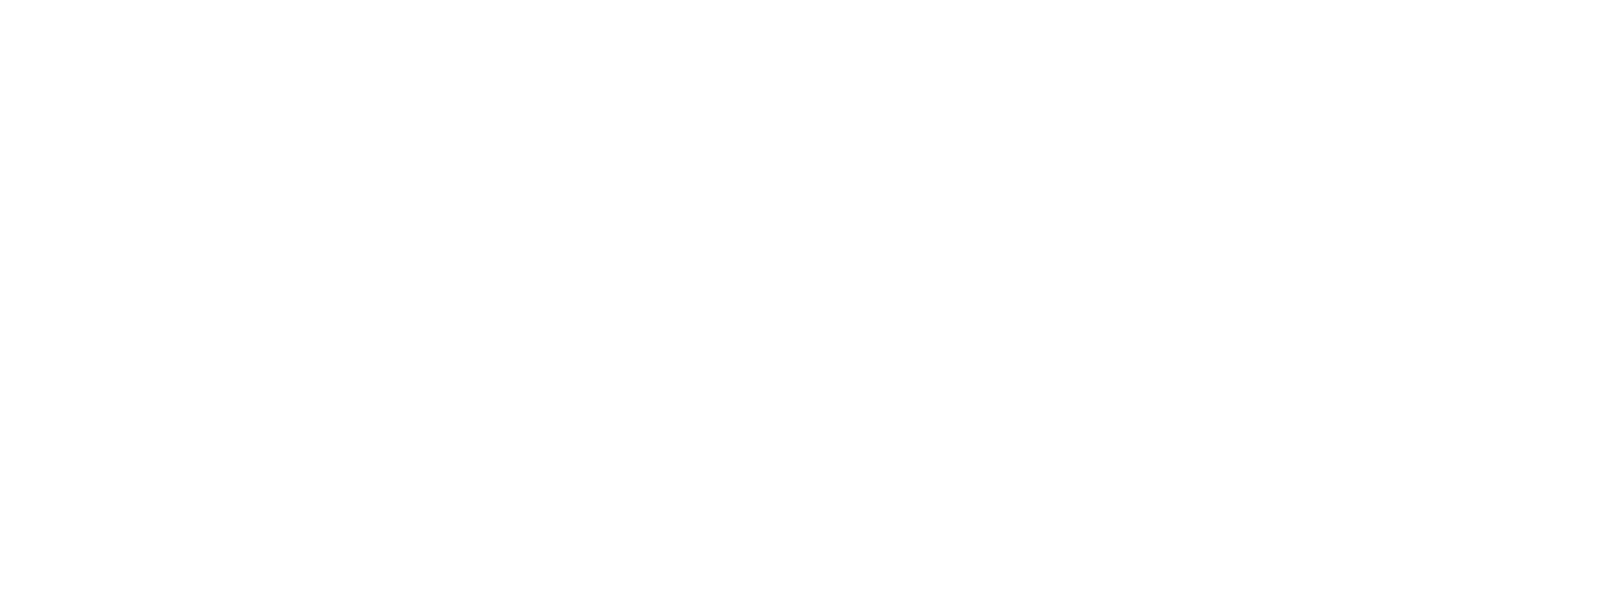

In [5]:
%%R -w 1600 -h 600

library('MSstatsTMT', warn.conflicts = F, quietly = T, verbose = F)
library("dplyr")

openms_output = './out_msstats.csv'
raw.om = read.csv(openms_output, header = TRUE, sep = ',')
raw.om = raw.om[!grepl("DECOY", raw.om$ProteinName),]
input.om <- OpenMStoMSstatsTMTFormat(raw.om)

INFO  [2021-12-14 09:05:40] ** MSstatsTMT - proteinSummarization function
INFO  [2021-12-14 09:05:40] Summarizing for Run : 1_1_1 ( 1  of  1 )
  |======================================================================| 100%
INFO  [2021-12-14 09:06:45] ** Protein-level summarization done by MSstats.


R[write to console]: Drew the Profile plot for 1 proteins.



  |======================================================================| 100%


R[write to console]: Drew the Profile plot with summarization for 1 proteins.



  |======================================================================| 100%


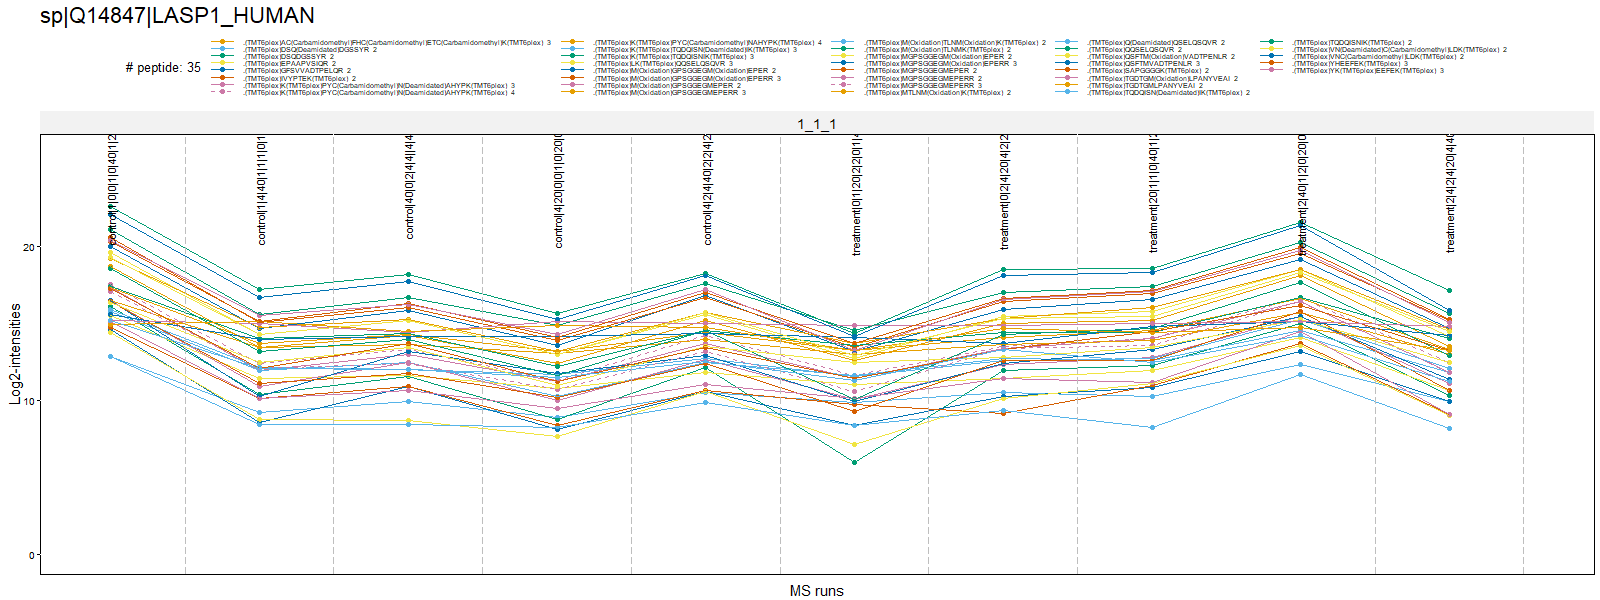

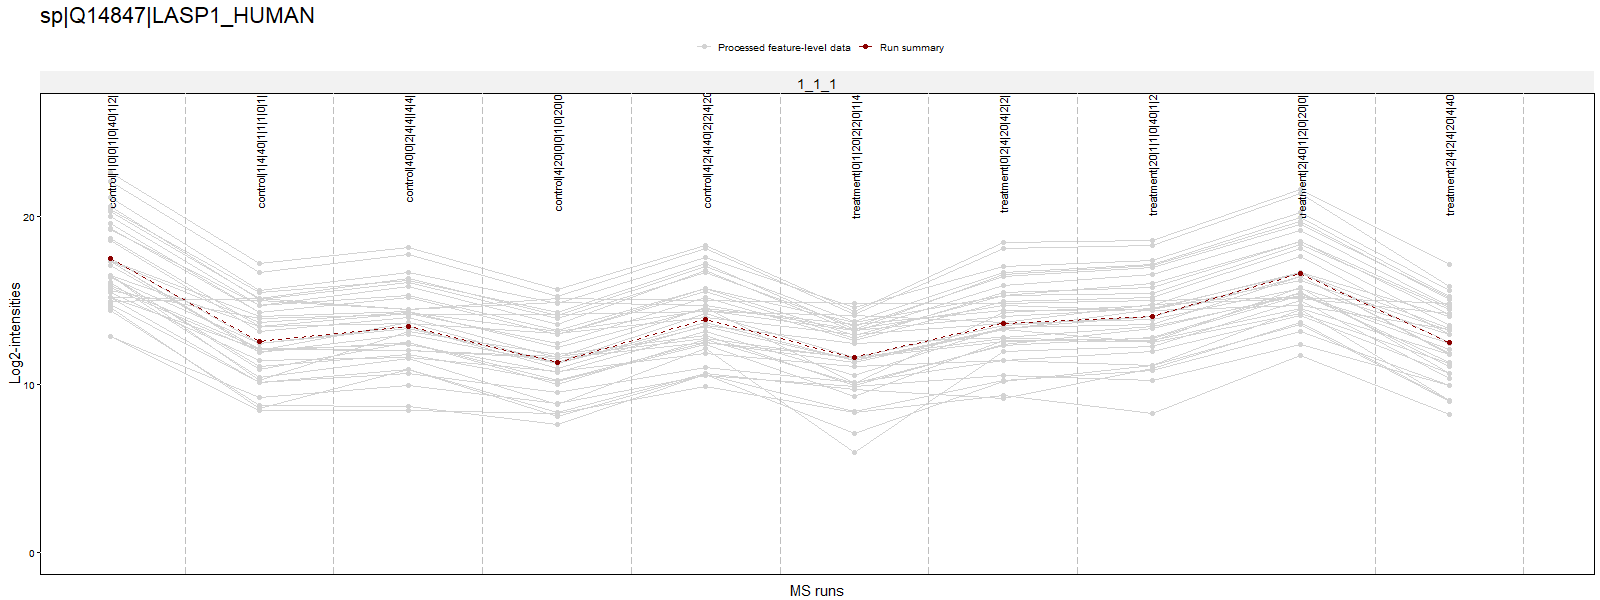

In [9]:
%%R -w 1600 -h 600


input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"control|1|0|0|1|0|40|1|2|2|0|40|4|21",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"control|4|20|0|0|1|0|20|0|1|40|2|2|64",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"control|40|0|2|4|4||4|4|1|2|2|20|1",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"control|1|4|40|1|1|1|0|1|40|1|0|1|79",
        input.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"control|4|2|4|40|2|2|4|20|1|4|4|0|81",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"treatment|0|2|4|20|4|2|2|4|2|2|4|40|5",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"treatment|20|1|1|0|40|1|2|0|20|0|1|1|0",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"treatment|2|40|1|2|0|20|0|2|0|1|20|4|32",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"treatment|0|1|20|2|2|0|1|40|0|20|1|0|85",
        input.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"treatment|2|4|2|4|20|4|40|4|4|4|0|2|12"))


# use MSstatsTMT for protein summarization
quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

## Profile plot without norm channnels and empty channels
dataProcessPlotsTMT(data=quant_om.msstats,
                     type = 'ProfilePlot',
                     which.Protein = 'sp|Q14847|LASP1_HUMAN',  # spiked-in protein
                     width = 25, # adjust the figure width 
                     height = 12,
                     address=FALSE)

In [11]:
%%R
head(quant_om.msstats$ProteinLevelData)
write.csv(quant_om.msstats$ProteinLevelData, "ProteinLevelData.csv", row.names=FALSE, col.names=TRUE,sep=",")

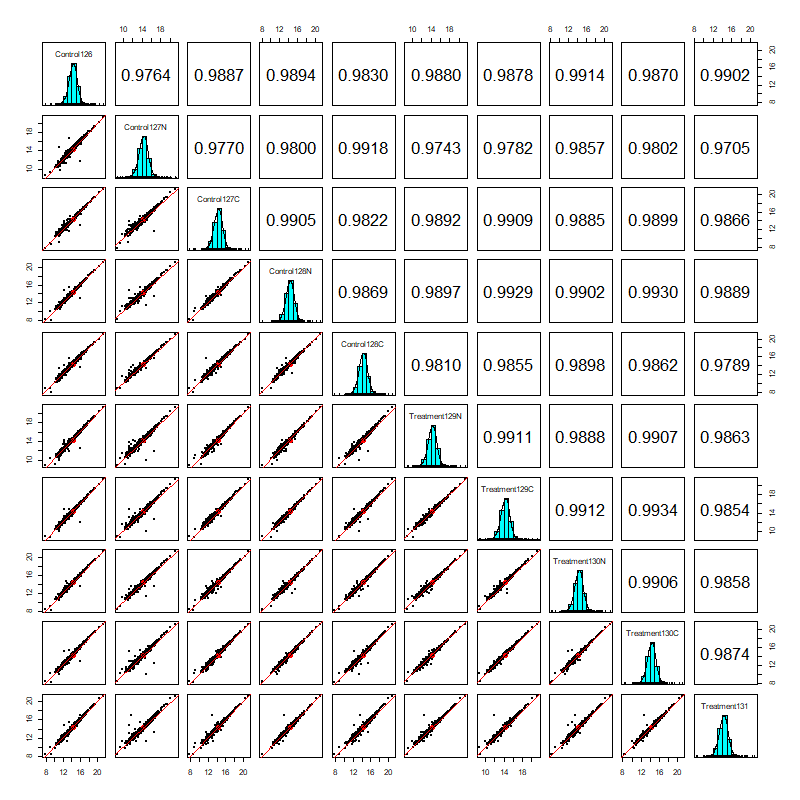

In [71]:
%%R -w 800 -h 800
library("dplyr") 
library("psych")

protfile = './ProteinLevelData.csv'
prot_data = read.csv(protfile, header = TRUE, sep = ',')

# spiked proteins
spiked.proteins <- c("ENO1" = "sp|P06733|ENOA_HUMAN", "ARG1" = "sp|P05089|ARGI1_HUMAN", "FABP4" = "P15090", "PTGES3" = "sp|P15090|FABP4_HUMAN", "KPNA2" = "P52292", 
                     "LASP1" = "sp|Q14847|LASP1_HUMAN", "HDAC3"= "sp|O15379|HDAC3_HUMAN", "KCNIP3" = "sp|Q9Y2W7|CSEN_HUMAN", "OTUB1" = "sp|Q96FW1|OTUB1_HUMAN", "GABARAPL1" = "sp|Q9H0R8|GBRL1_HUMAN",
                     "GAS7" = "sp|O60861|GAS7_HUMAN", "EZR" = "sp|P15311|EZRI_HUMAN", "Alb" = "sp|P02769|ALBU_BOVIN")

background = prot_data[!prot_data$Protein %in% as.character(spiked.proteins),]

pair_T = data.frame()
C1 <- subset(background, Channel=='1', select=c('Protein','Abundance'))
C2 <- subset(background, Channel=='2', select=c('Protein','Abundance'))
C3  <- subset(background, Channel=='3', select=c('Protein','Abundance'))
C4<- subset(background, Channel=='4', select=c('Protein','Abundance'))
C5 <- subset(background, Channel=='5', select=c('Protein','Abundance'))
C6 <- subset(background, Channel=='6', select=c('Protein','Abundance'))
C7 <- subset(background, Channel=='7', select=c('Protein','Abundance'))
C8 <- subset(background, Channel=='8', select=c('Protein','Abundance'))
C9 <- subset(background, Channel=='9', select=c('Protein','Abundance'))
C10 <- subset(background, Channel=='10', select=c('Protein','Abundance'))
pair_T = full_join(C1, C2, by="Protein")
pair_T = full_join(pair_T, C3, by="Protein")
pair_T = full_join(pair_T, C4, by="Protein")
pair_T = full_join(pair_T, C5, by="Protein")
pair_T = full_join(pair_T, C6, by="Protein")
pair_T = full_join(pair_T, C7, by="Protein")
pair_T = full_join(pair_T, C8, by="Protein")
pair_T = full_join(pair_T, C9, by="Protein")
pair_T = full_join(pair_T, C10, by="Protein")

colnames(pair_T) <- c('Protein','Control126', 'Control127N', 'Control127C',"Control128N" , 'Control128C','Treatment129N', 'Treatment129C', 'Treatment130N','Treatment130C', 'Treatment131')
pairs.panels(pair_T[,2:11], lm = TRUE, digits=4)


#### Similar to theoriginal study, we assigned thefirstfive channels to onetreatment group, and the secondfive channels to the secondgroup. As expected, no proteins were identified as beingsignificantly regulated. The estimated log-fold changes of theE.colibackground proteins were all close to 0.

In [72]:
%%R

input.om$Condition = data.frame(input.om)%>%select(Condition)%>%
    mutate(Condition=case_when(input.om$Condition == "control|1|0|0|1|0|40|1|2|2|0|40|4|21"~"control",
        input.om$Condition == "control|4|20|0|0|1|0|20|0|1|40|2|2|64"~"control",
        input.om$Condition == "control|40|0|2|4|4||4|4|1|2|2|20|1"~"control",
        input.om$Condition == "control|1|4|40|1|1|1|0|1|40|1|0|1|79"~"control",
        input.om$Condition == "control|4|2|4|40|2|2|4|20|1|4|4|0|81"~"control",
        input.om$Condition == "treatment|0|2|4|20|4|2|2|4|2|2|4|40|5"~"treatment",
        input.om$Condition == "treatment|20|1|1|0|40|1|2|0|20|0|1|1|0"~"treatment",
        input.om$Condition == "treatment|2|40|1|2|0|20|0|2|0|1|20|4|32"~"treatment",
        input.om$Condition == "treatment|0|1|20|2|2|0|1|40|0|20|1|0|85"~"treatment",
        input.om$Condition == "treatment|2|4|2|4|20|4|40|4|4|4|0|2|12"~"treatment"))



quant_om.msstats <- proteinSummarization(input.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

levels(quant_om.msstats$ProteinLevelData$Condition)

INFO  [2021-12-14 10:13:36] ** MSstatsTMT - proteinSummarization function
INFO  [2021-12-14 10:13:39] Summarizing for Run : 1_1_1 ( 1  of  1 )
  |======================================================================| 100%
INFO  [2021-12-14 10:14:44] ** Protein-level summarization done by MSstats.
[1] "control"   "treatment"


In [73]:
%%R -w 1000 -h 600

TMT_Comp<-matrix(c(-1, 1), nrow=1)
row.names(TMT_Comp)<-c("treatment vs control")
colnames(TMT_Comp) = c("control","treatment")


TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

head(TMT_Comp.pairwise$ComparisonResult)
write.csv(TMT_Comp.pairwise$ComparisonResult, 'comparison_res.csv', row.names=FALSE,col.names=TRUE,sep=",")

INFO  [2021-12-14 10:14:44] Model fitting for 2391 proteins.
  |======================================================================| 100%
INFO  [2021-12-14 10:15:00] Testing for 2391 proteins:
  |======================================================================| 100%


In [6]:
%%R
library("vioplot")
library("ggplot2")

comp_res = read.csv('comparison_res.csv', header = TRUE, sep = ',')

myplot = ggplot(comp_res, aes(adj.pvalue)) +
  geom_histogram(bins = 100, fill= "#404080") + ggtitle("P-value distribution\nComparison") + theme(plot.title = element_text(hjust = 0.5))

ggsave(file="mygraph.png",plot=myplot,width=5,height=4, dpi=500)


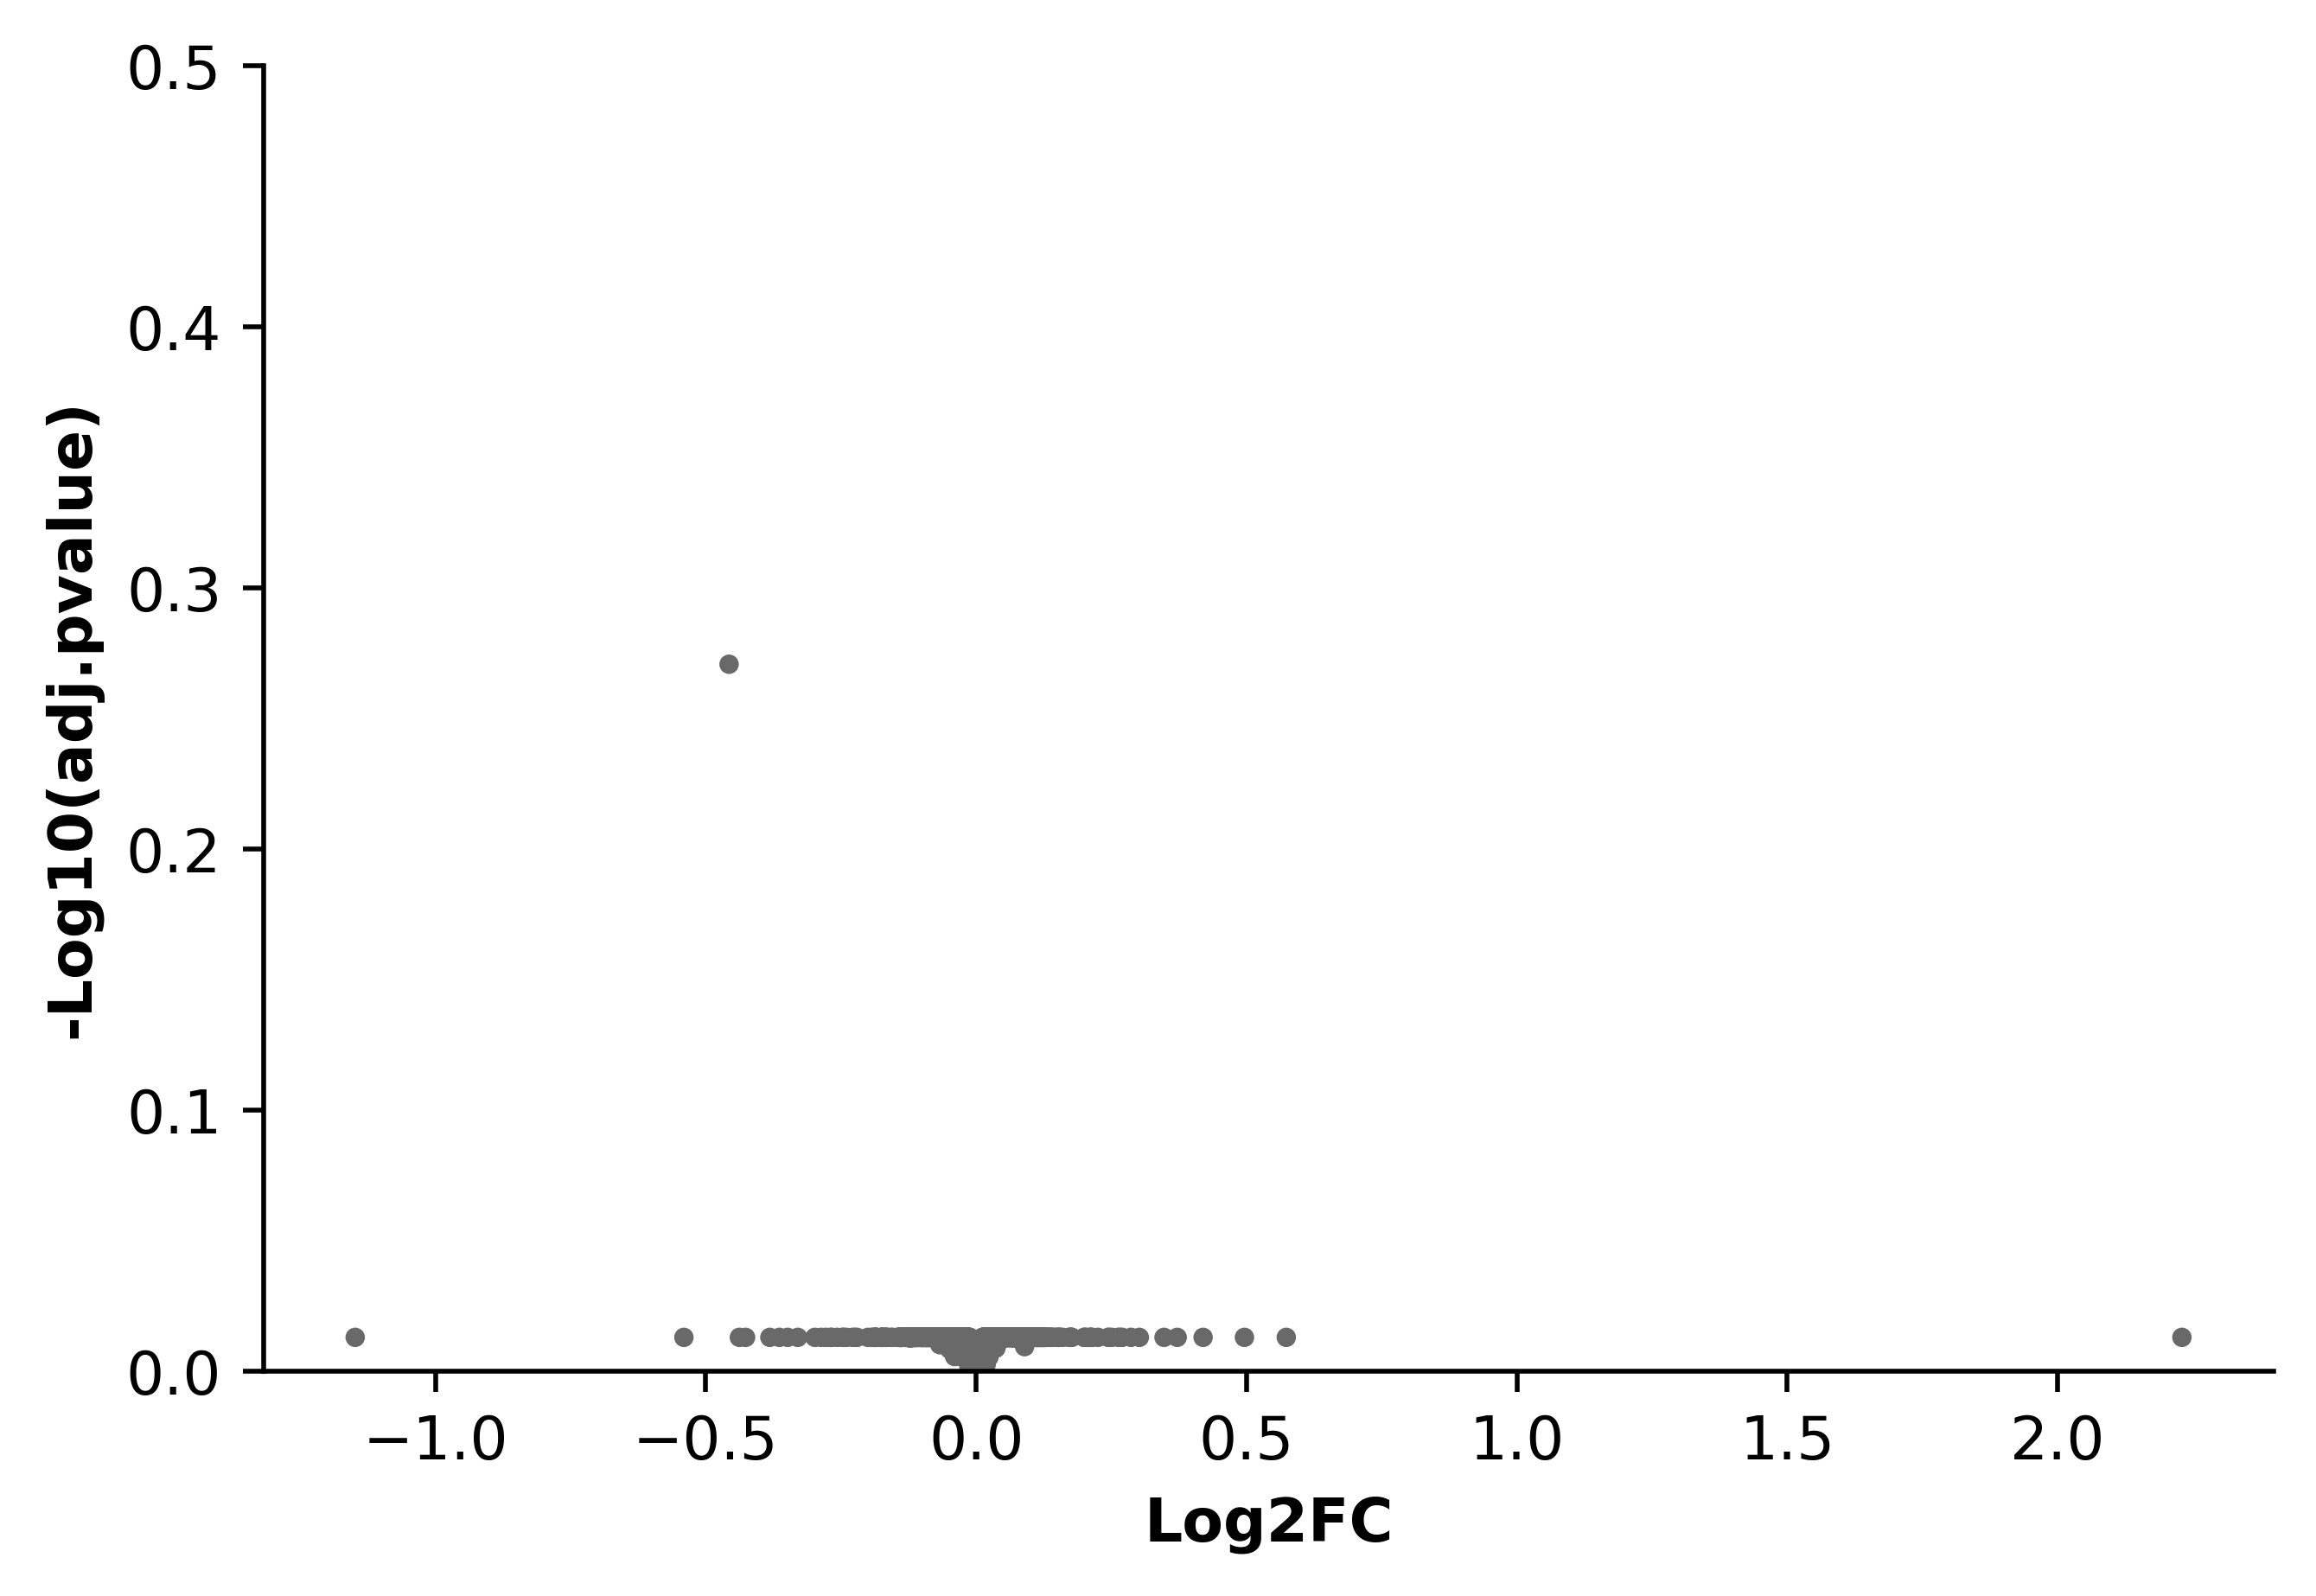

In [76]:
fig = plt.figure(dpi=500)
ax = fig.add_subplot(111)
data = pd.read_csv("comparison_res.csv", sep=",", header=0)
data = data[data['Protein'].str.contains("ECOLI")]
data["-Log10(adj.pvalue)"] = -np.log10(data['adj.pvalue'])
data.loc[data['adj.pvalue'] < 0.05,'group'] = 'tab:red' 
data.loc[data['adj.pvalue'] >= 0.05,'group'] = 'dimgrey'
ax.scatter(data['log2FC'], data["-Log10(adj.pvalue)"], s=5, c=data['group'])
ax.set_ylabel('-Log10(adj.pvalue)',fontweight='bold')
ax.set_xlabel('Log2FC',fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(0, 0.5)
plt.show()

In [77]:
%%R
ENO1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ENO1.om$Condition = data.frame(ENO1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ENO1;QY=40 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ENO1;QY=1 pmol",
        ENO1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ENO1;QY=4 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ENO1;QY=20 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ENO1;QY=2 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ENO1;QY=0 pmol",
        ENO1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ENO1;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(ENO1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c("CT=protein;AC=ENO1;QY=0 pmol", "CT=protein;AC=ENO1;QY=4 pmol", "CT=protein;AC=ENO1;QY=20 pmol", "CT=protein;AC=ENO1;QY=2 pmol", "CT=protein;AC=ENO1;QY=40 pmol", "CT=protein;AC=ENO1;QY=1 pmol")
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ENO1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P06733|ENOA_HUMAN"]
ENO1FC

INFO  [2021-12-14 10:52:06] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 10:52:07] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 10:52:08] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 10:52:08] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 10:52:08] ** Shared peptides are removed.
INFO  [2021-12-14 10:52:08] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 10:52:50] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 10:52:55] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 10:52:55] ** Fractions belongin

In [78]:
%%R

ARGI1.om <- OpenMStoMSstatsTMTFormat(raw.om)
ARGI1.om$Condition = data.frame(ARGI1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=ARG1;QY=20 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=ARG1;QY=0 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=ARG1;QY=4 pmol",
        ARGI1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=ARG1;QY=2 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=ARG1;QY=40 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=ARG1;QY=1 pmol",
        ARGI1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=ARG1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(ARGI1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)

TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=ARG1;QY=2 pmol','CT=protein;AC=ARG1;QY=1 pmol','CT=protein;AC=ARG1;QY=40 pmol','CT=protein;AC=ARG1;QY=4 pmol','CT=protein;AC=ARG1;QY=0 pmol','CT=protein;AC=ARG1;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)

ARG1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P05089|ARGI1_HUMAN"]
ARG1FC

INFO  [2021-12-14 10:54:36] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 10:54:38] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 10:54:38] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 10:54:38] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 10:54:38] ** Shared peptides are removed.
INFO  [2021-12-14 10:54:39] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 10:55:19] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 10:55:24] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 10:55:24] ** Fractions belongin

In [79]:
%%R

FABP4.om <- OpenMStoMSstatsTMTFormat(raw.om)
FABP4.om$Condition = data.frame(FABP4.om)%>%select(Condition)%>%
    mutate(Condition=case_when(FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=FABP4;QY=0 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=FABP4;QY=2 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=FABP4;QY=40 pmol",
        FABP4.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=FABP4;QY=4 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=FABP4;QY=1 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=FABP4;QY=20 pmol",
        FABP4.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=FABP4;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(FABP4.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=FABP4;QY=4 pmol','CT=protein;AC=FABP4;QY=1 pmol','CT=protein;AC=FABP4;QY=20 pmol','CT=protein;AC=FABP4;QY=2 pmol','CT=protein;AC=FABP4;QY=0 pmol','CT=protein;AC=FABP4;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
FABP4FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15090|FABP4_HUMAN"]
FABP4FC

INFO  [2021-12-14 10:57:07] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 10:57:09] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 10:57:09] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 10:57:09] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 10:57:10] ** Shared peptides are removed.
INFO  [2021-12-14 10:57:10] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 10:57:49] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 10:57:54] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 10:57:54] ** Fractions belongin

In [80]:
%%R

TEBP.om <- OpenMStoMSstatsTMTFormat(raw.om)
TEBP.om$Condition = data.frame(TEBP.om)%>%select(Condition)%>%
    mutate(Condition=case_when(TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=PTGES3;QY=1 pmol",
        TEBP.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=PTGES3;QY=40 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=PTGES3;QY=20 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=PTGES3;QY=0 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=PTGES3;QY=2 pmol",
        TEBP.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=PTGES3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(TEBP.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=PTGES3;QY=20 pmol','CT=protein;AC=PTGES3;QY=40 pmol','CT=protein;AC=PTGES3;QY=0 pmol','CT=protein;AC=PTGES3;QY=2 pmol','CT=protein;AC=PTGES3;QY=4 pmol','CT=protein;AC=PTGES3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
TEBPFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q15185|TEBP_HUMAN"]
TEBPFC

INFO  [2021-12-14 10:59:20] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 10:59:22] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 10:59:22] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 10:59:22] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 10:59:22] ** Shared peptides are removed.
INFO  [2021-12-14 10:59:22] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 11:00:00] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 11:00:06] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 11:00:06] ** Fractions belongin

In [81]:
%%R

IMA1.om <- OpenMStoMSstatsTMTFormat(raw.om)
IMA1.om$Condition = data.frame(IMA1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KPNA2;QY=1 pmol",
        IMA1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KPNA2;QY=4 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KPNA2;QY=40 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KPNA2;QY=0 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KPNA2;QY=2 pmol",
        IMA1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KPNA2;QY=20 pmol"))

quant_om.msstats <- proteinSummarization(IMA1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KPNA2;QY=4 pmol','CT=protein;AC=KPNA2;QY=2 pmol','CT=protein;AC=KPNA2;QY=40 pmol','CT=protein;AC=KPNA2;QY=0 pmol','CT=protein;AC=KPNA2;QY=20 pmol','CT=protein;AC=KPNA2;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
IMA1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P52292|IMA1_HUMAN"]
IMA1FC


INFO  [2021-12-14 11:01:34] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 11:01:36] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 11:01:36] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 11:01:36] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 11:01:36] ** Shared peptides are removed.
INFO  [2021-12-14 11:01:36] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 11:02:16] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 11:02:21] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 11:02:21] ** Fractions belongin

In [82]:
%%R

LASP1.om <- OpenMStoMSstatsTMTFormat(raw.om)
LASP1.om$Condition = data.frame(LASP1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=LASP1;QY=40 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=LASP1;QY=4 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=LASP1;QY=2 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=LASP1;QY=1 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=LASP1;QY=20 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=LASP1;QY=0 pmol",
        LASP1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=LASP1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(LASP1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=LASP1;QY=2 pmol','CT=protein;AC=LASP1;QY=1 pmol','CT=protein;AC=LASP1;QY=20 pmol','CT=protein;AC=LASP1;QY=0 pmol','CT=protein;AC=LASP1;QY=4 pmol','CT=protein;AC=LASP1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
LASP1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q14847|LASP1_HUMAN"]
LASP1FC

INFO  [2021-12-14 11:03:47] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 11:03:48] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 11:03:49] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 11:03:49] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 11:03:49] ** Shared peptides are removed.
INFO  [2021-12-14 11:03:49] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 11:04:29] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 11:04:34] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 11:04:34] ** Fractions belongin

In [83]:
%%R

HDAC3.om <- OpenMStoMSstatsTMTFormat(raw.om)
HDAC3.om$Condition = data.frame(HDAC3.om)%>%select(Condition)%>%
    mutate(Condition=case_when(HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=HDAC3;QY=20 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=HDAC3;QY=4 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=HDAC3;QY=2 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=HDAC3;QY=0 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=HDAC3;QY=1 pmol",
        HDAC3.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=HDAC3;QY=40 pmol"))

quant_om.msstats <- proteinSummarization(HDAC3.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 1, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=HDAC3;QY=2 pmol','CT=protein;AC=HDAC3;QY=4 pmol','CT=protein;AC=HDAC3;QY=0 pmol','CT=protein;AC=HDAC3;QY=1 pmol','CT=protein;AC=HDAC3;QY=40 pmol','CT=protein;AC=HDAC3;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
HDAC3FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O15379|HDAC3_HUMAN"]
HDAC3FC

INFO  [2021-12-14 11:05:59] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 11:06:01] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 11:06:01] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 11:06:02] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 11:06:02] ** Shared peptides are removed.
INFO  [2021-12-14 11:06:02] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 11:06:40] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 11:06:45] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 11:06:45] ** Fractions belongin

In [84]:
%%R

CSEN.om <- OpenMStoMSstatsTMTFormat(raw.om)
CSEN.om$Condition = data.frame(CSEN.om)%>%select(Condition)%>%
    mutate(Condition=case_when(CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=KCNIP3;QY=1 pmol",
        CSEN.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=KCNIP3;QY=20 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=KCNIP3;QY=0 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=KCNIP3;QY=2 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=KCNIP3;QY=40 pmol",
        CSEN.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=KCNIP3;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(CSEN.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, -1, -1, -1, -1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=KCNIP3;QY=4 pmol','CT=protein;AC=KCNIP3;QY=20 pmol','CT=protein;AC=KCNIP3;QY=0 pmol','CT=protein;AC=KCNIP3;QY=2 pmol','CT=protein;AC=KCNIP3;QY=40 pmol','CT=protein;AC=KCNIP3;QY=1 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
CSENFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9Y2W7|CSEN_HUMAN"]
CSENFC

INFO  [2021-12-14 11:08:15] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 11:08:17] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 11:08:17] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 11:08:17] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 11:08:17] ** Shared peptides are removed.
INFO  [2021-12-14 11:08:17] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 11:08:56] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 11:09:01] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 11:09:01] ** Fractions belongin

In [85]:
%%R

OTUB1.om <- OpenMStoMSstatsTMTFormat(raw.om)
OTUB1.om$Condition = data.frame(OTUB1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=OTUB1;QY=40 pmol",
        OTUB1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=OTUB1;QY=1 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=OTUB1;QY=2 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=OTUB1;QY=20 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=OTUB1;QY=0 pmol",
        OTUB1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=OTUB1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(OTUB1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=OTUB1;QY=2 pmol','CT=protein;AC=OTUB1;QY=1 pmol','CT=protein;AC=OTUB1;QY=20 pmol','CT=protein;AC=OTUB1;QY=0 pmol','CT=protein;AC=OTUB1;QY=4 pmol','CT=protein;AC=OTUB1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
OTUB1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q96FW1|OTUB1_HUMAN"]
OTUB1FC


INFO  [2021-12-14 11:10:25] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 11:10:27] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 11:10:27] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 11:10:27] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 11:10:27] ** Shared peptides are removed.
INFO  [2021-12-14 11:10:27] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 11:11:02] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 11:11:08] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 11:11:08] ** Fractions belongin

In [86]:
%%R

GBRL1.om <- OpenMStoMSstatsTMTFormat(raw.om)
GBRL1.om$Condition = data.frame(GBRL1.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GABARAPL1;QY=40 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GABARAPL1;QY=2 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GABARAPL1;QY=0 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GABARAPL1;QY=1 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GABARAPL1;QY=20 pmol",
        GBRL1.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GABARAPL1;QY=4 pmol"))

quant_om.msstats <- proteinSummarization(GBRL1.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 1), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GABARAPL1;QY=2 pmol','CT=protein;AC=GABARAPL1;QY=4 pmol','CT=protein;AC=GABARAPL1;QY=0 pmol','CT=protein;AC=GABARAPL1;QY=1 pmol','CT=protein;AC=GABARAPL1;QY=20 pmol','CT=protein;AC=GABARAPL1;QY=40 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GBRL1FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|Q9H0R8|GBRL1_HUMAN"]
GBRL1FC

INFO  [2021-12-14 11:12:31] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 11:12:33] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 11:12:33] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 11:12:33] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 11:12:34] ** Shared peptides are removed.
INFO  [2021-12-14 11:12:34] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 11:13:09] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 11:13:14] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 11:13:15] ** Fractions belongin

In [87]:
%%R

GAS7.om <- OpenMStoMSstatsTMTFormat(raw.om)
GAS7.om$Condition = data.frame(GAS7.om)%>%select(Condition)%>%
    mutate(Condition=case_when(GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=GAS7;QY=40 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=GAS7;QY=2 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=GAS7;QY=0 pmol",
        GAS7.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=GAS7;QY=4 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=GAS7;QY=20 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=GAS7;QY=1 pmol",
        GAS7.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=GAS7;QY=0 pmol"))

quant_om.msstats <- proteinSummarization(GAS7.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 1, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=GAS7;QY=4 pmol','CT=protein;AC=GAS7;QY=1 pmol','CT=protein;AC=GAS7;QY=20 pmol','CT=protein;AC=GAS7;QY=0 pmol','CT=protein;AC=GAS7;QY=40 pmol','CT=protein;AC=GAS7;QY=2 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
GAS7FC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|O60861|GAS7_HUMAN"]
GAS7FC

INFO  [2021-12-14 11:14:42] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 11:14:44] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 11:14:44] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 11:14:44] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 11:14:44] ** Shared peptides are removed.
INFO  [2021-12-14 11:14:45] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 11:15:20] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 11:15:25] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 11:15:25] ** Fractions belongin

In [88]:
%%R

EZRI.om <- OpenMStoMSstatsTMTFormat(raw.om)
EZRI.om$Condition = data.frame(EZRI.om)%>%select(Condition)%>%
    mutate(Condition=case_when(EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=40 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=40 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=21 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=20 pmol|CT=protein;AC=FABP4;QY=0 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=20 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=40 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=64 pmol"~"CT=protein;AC=EZR;QY=2 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=40 pmol|CT=protein;AC=ARG1;QY=0 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=2 pmol|CT=protein;AC=EZR;QY=20 pmol|CT=protein;AC=Albumin;QY=1 pmol"~"CT=protein;AC=EZR;QY=20 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=1 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=40 pmol|CT=protein;AC=PTGES3;QY=1 pmol|CT=protein;AC=KPNA2;QY=1 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=1 pmol|CT=protein;AC=OTUB1;QY=40 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=79 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "control|CT=protein;AC=ENO1;QY=4 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=40 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=4 pmol|CT=protein;AC=KCNIP3;QY=20 pmol|CT=protein;AC=OTUB1;QY=1 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=81 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=2 pmol|CT=protein;AC=FABP4;QY=4 pmol|CT=protein;AC=PTGES3;QY=20 pmol|CT=protein;AC=KPNA2;QY=4 pmol|CT=protein;AC=LASP1;QY=2 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=2 pmol|CT=protein;AC=GABARAPL1;QY=2 pmol|CT=protein;AC=GAS7;QY=4 pmol|CT=protein;AC=EZR;QY=40 pmol|CT=protein;AC=Albumin;QY=5 pmol"~"CT=protein;AC=EZR;QY=40 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=20 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=0 pmol|CT=protein;AC=KPNA2;QY=40 pmol|CT=protein;AC=LASP1;QY=1 pmol|CT=protein;AC=HDAC3;QY=2 pmol|CT=protein;AC=KCNIP3;QY=0 pmol|CT=protein;AC=OTUB1;QY=20 pmol|CT=protein;AC=GABARAPL1;QY=0 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=1 pmol|CT=protein;AC=Albumin;QY=0 pmol"~"CT=protein;AC=EZR;QY=1 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=40 pmol|CT=protein;AC=FABP4;QY=1 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=0 pmol|CT=protein;AC=LASP1;QY=20 pmol|CT=protein;AC=HDAC3;QY=0 pmol|CT=protein;AC=KCNIP3;QY=2 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=1 pmol|CT=protein;AC=GAS7;QY=20 pmol|CT=protein;AC=EZR;QY=4 pmol|CT=protein;AC=Albumin;QY=32 pmol"~"CT=protein;AC=EZR;QY=4 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=0 pmol|CT=protein;AC=ARG1;QY=1 pmol|CT=protein;AC=FABP4;QY=20 pmol|CT=protein;AC=PTGES3;QY=2 pmol|CT=protein;AC=KPNA2;QY=2 pmol|CT=protein;AC=LASP1;QY=0 pmol|CT=protein;AC=HDAC3;QY=1 pmol|CT=protein;AC=KCNIP3;QY=40 pmol|CT=protein;AC=OTUB1;QY=0 pmol|CT=protein;AC=GABARAPL1;QY=20 pmol|CT=protein;AC=GAS7;QY=1 pmol|CT=protein;AC=EZR;QY=0 pmol|CT=protein;AC=Albumin;QY=85 pmol"~"CT=protein;AC=EZR;QY=0 pmol",
        EZRI.om$Condition == "treatment|CT=protein;AC=ENO1;QY=2 pmol|CT=protein;AC=ARG1;QY=4 pmol|CT=protein;AC=FABP4;QY=2 pmol|CT=protein;AC=PTGES3;QY=4 pmol|CT=protein;AC=KPNA2;QY=20 pmol|CT=protein;AC=LASP1;QY=4 pmol|CT=protein;AC=HDAC3;QY=40 pmol|CT=protein;AC=KCNIP3;QY=4 pmol|CT=protein;AC=OTUB1;QY=4 pmol|CT=protein;AC=GABARAPL1;QY=4 pmol|CT=protein;AC=GAS7;QY=0 pmol|CT=protein;AC=EZR;QY=2 pmol|CT=protein;AC=Albumin;QY=12 pmol"~"CT=protein;AC=EZR;QY=2 pmol"))

quant_om.msstats <- proteinSummarization(EZRI.om,
                                      method="msstats",
                                      global_norm=TRUE,
                                      reference_norm=FALSE,
                                      remove_norm_channel = FALSE,
                                      remove_empty_channel = TRUE)


TMT_Comp<-matrix(c(0, 0, 0, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0), nrow=4)
row.names(TMT_Comp)<-c("FC2", "FC4", "FC20", "FC40")
colnames(TMT_Comp) = c('CT=protein;AC=EZR;QY=40 pmol','CT=protein;AC=EZR;QY=0 pmol','CT=protein;AC=EZR;QY=1 pmol','CT=protein;AC=EZR;QY=4 pmol','CT=protein;AC=EZR;QY=2 pmol','CT=protein;AC=EZR;QY=20 pmol')
TMT_Comp.pairwise <- groupComparisonTMT(quant_om.msstats, contrast.matrix = TMT_Comp, moderated = TRUE)
EZRIFC = TMT_Comp.pairwise$ComparisonResult[Protein == "sp|P15311|EZRI_HUMAN"]
EZRIFC

INFO  [2021-12-14 11:16:53] ** Raw data from OpenMS imported successfully.
INFO  [2021-12-14 11:16:55] ** Raw data from OpenMS cleaned successfully.
INFO  [2021-12-14 11:16:55] ** The following options are used:
  - Features will be defined by the columns: PeptideSequence, PrecursorCharge
  - Shared peptides will be removed.
  - Proteins with single feature will not be removed.
  - Features with less than 3 measurements within each run will be removed.
INFO  [2021-12-14 11:16:55] ** Features with all missing measurements across channels within each run are removed.
INFO  [2021-12-14 11:16:56] ** Shared peptides are removed.
INFO  [2021-12-14 11:16:56] ** Features with one or two measurements across channels within each run are removed.
INFO  [2021-12-14 11:17:32] ** PSMs have been aggregated to peptide ions.
INFO  [2021-12-14 11:17:37] ** For peptides overlapped between fractions of 1_1_1 use the fraction with maximal average abundance.
INFO  [2021-12-14 11:17:37] ** Fractions belongin

In [90]:
%%R

CFC = rbind(ENO1FC, ARG1FC, FABP4FC, TEBPFC, IMA1FC, LASP1FC, HDAC3FC, CSENFC, OTUB1FC, GBRL1FC, GAS7FC, EZRIFC)

FC2Column = c(round(sum(2^CFC[Label == "FC2"]$log2FC) / 12.0 - 2, 1), -0.6, -0.6, (sum((2^CFC[Label == "FC2"]$log2FC - 2)^2) / 12)^0.5, 1, 1)
FC4Column = c(round(sum(2^CFC[Label == "FC4"]$log2FC) / 12.0 - 4, 1), -2, -1.8, (sum((2^CFC[Label == "FC4"]$log2FC - 4)^2) / 12)^0.5, 2.1, 1.9)
FC20Column = c(round(sum(2^CFC[Label == "FC20"]$log2FC) / 12.0 - 20, 1), -11.4, -11.7, (sum((2^CFC[Label == "FC20"]$log2FC - 20)^2) / 12)^0.5, 11.8, 11.2)
FC40Column = c(round(sum(2^CFC[Label == "FC40"]$log2FC) / 12.0 - 40, 1), -22.7, -21.9, (sum((2^CFC[Label == "FC40"]$log2FC - 40)^2) / 12)^0.5, 23.5, 22.3)

ComRes = data.frame(FC2Column, FC4Column, FC20Column, FC40Column,
                   row.names = c("Bias(quantms)", "Bias(IsoProt)", "Bias(ref)", "RMSE(quantms)", "RMSE(IsoProt)", "RMSE(ref)"))
options(digits = 3)
names(ComRes) <- c("2", "4", "20", "40")
ComRes

                   2     4    20    40
Bias(quantms) -0.500 -1.80  -9.8 -19.3
Bias(IsoProt) -0.600 -2.00 -11.4 -22.7
Bias(ref)     -0.600 -1.80 -11.7 -21.9
RMSE(quantms)  0.557  1.84  10.1  19.8
RMSE(IsoProt)  1.000  2.10  11.8  23.5
RMSE(ref)      1.000  1.90  11.2  22.3
